In [ ]:
# Credit Card Fraud Detection
# Author: Jennifer Cheng
# Created on Nov 4, 2024



# Install all needed libraries if it is not present

if(!require(tidyverse)) install.packages("tidyverse")
if(!require(kableExtra)) install.packages("kableExtra")
if(!require(tidyr)) install.packages("tidyr")
if(!require(tidyverse)) install.packages("tidyverse")
if(!require(stringr)) install.packages("stringr")
if(!require(ggplot2)) install.packages("ggplot2")
if(!require(gbm)) install.packages("gbm")
if(!require(dplyr)) install.packages("dplyr")
if(!require(caret)) install.packages("caret")
if(!require(xgboost)) install.packages("xgboost")
if(!require(e1071)) install.packages("e1071")
if(!require(class)) install.packages("class")
if(!require(ROCR)) install.packages("ROCR")
if(!require(randomForest)) install.packages("randomForest")
if(!require(PRROC)) install.packages("PRROC")
if(!require(reshape2)) install.packages("reshape2")

Loading required package: tidyverse

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: kableExtra

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘kableExtra’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘svglite’


Loading required package: gbm

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE

In [ ]:
# Loading all needed libraries

library(dplyr)
library(tidyverse)
library(kableExtra)
library(tidyr)
library(ggplot2)
library(gbm)
library(caret)
library(xgboost)
library(e1071)
library(class)
#library(lightgbm)
library(ROCR)
library(randomForest)
library(PRROC)
library(reshape2)


Attaching package: ‘kableExtra’


The following object is masked from ‘package:dplyr’:

    group_rows


Loaded gbm 2.2.2

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift



Attaching package: ‘xgboost’


The following object is masked from ‘package:dplyr’:

    slice


randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
## Loading the dataset

creditcard <- read.csv("creditcard.csv")

In [ ]:
# Check dimensions

df_summary <- data.frame("Length" = nrow(creditcard), "Columns" = ncol(creditcard))
print(df_summary)

imbalanced <- data.frame(creditcard)

imbalanced$Class = ifelse(creditcard$Class == 0, 'Legal', 'Fraud') %>% as.factor()
head(imbalanced)

  Length Columns
1 284807      31


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,Legal
2,0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,Legal
3,1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,Legal
4,1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,Legal
5,2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,Legal
6,2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,Legal


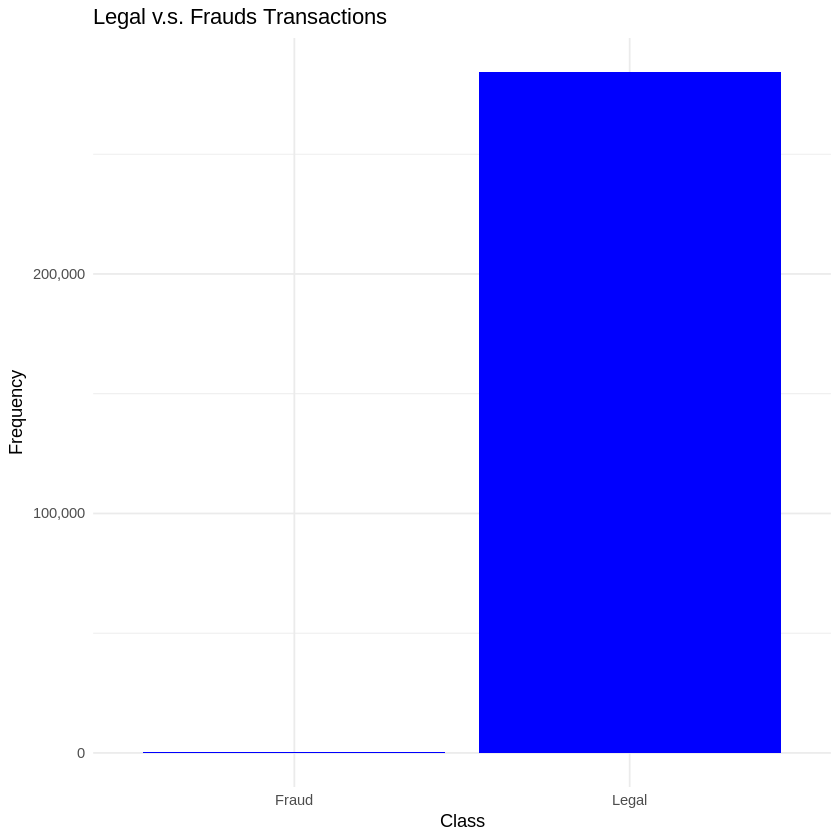

In [ ]:
# Visualize the proportion between classes

imbalanced %>%
  ggplot(aes(Class)) +
  theme_minimal()  +
  geom_bar(fill = "blue") +
  scale_x_discrete() +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Legal v.s. Frauds Transactions",
       x = "Class",
       y = "Frequency")

In [ ]:
# Find missing values

missing_values <- sapply(creditcard, function(x) sum(is.na(x)))

missing_values_df <- data.frame("Column" = names(missing_values), "Missing Values" = missing_values)

print(missing_values_df)

       Column Missing.Values
Time     Time              0
V1         V1              0
V2         V2              0
V3         V3              0
V4         V4              0
V5         V5              0
V6         V6              0
V7         V7              0
V8         V8              0
V9         V9              0
V10       V10              0
V11       V11              0
V12       V12              0
V13       V13              0
V14       V14              0
V15       V15              0
V16       V16              0
V17       V17              0
V18       V18              0
V19       V19              0
V20       V20              0
V21       V21              0
V22       V22              0
V23       V23              0
V24       V24              0
V25       V25              0
V26       V26              0
V27       V27              0
V28       V28              0
Amount Amount              0
Class   Class              0


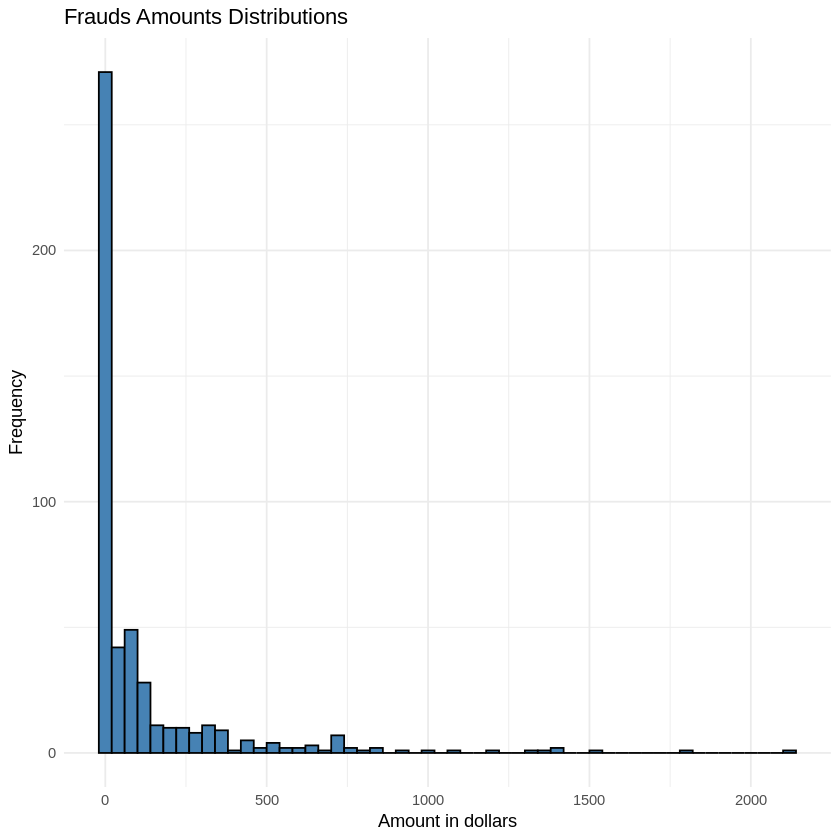

In [ ]:
# Frauds Amount

creditcard[creditcard$Class == 1,] %>%
  ggplot(aes(Amount)) +
  theme_minimal()  +
  geom_histogram(binwidth = 40, fill = "steelblue", color = "black") +
  labs(title = "Frauds Amounts Distributions",
       x = "Amount in dollars",
       y = "Frequency")

In [ ]:
top_fraud_amounts <- creditcard[creditcard$Class == 1,] %>%
  group_by(Amount) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  head(n=10)

print(top_fraud_amounts)


# A tibble: 10 × 2
   Amount count
    <dbl> <int>
 1   1      113
 2   0       27
 3 100.      27
 4   0.76    17
 5   0.77    10
 6   0.01     5
 7   2        4
 8   3.79     4
 9   0.68     3
10   1.1      3


# A tibble: 10 × 2
     Time count
    <dbl> <int>
 1  68207     6
 2  84204     4
 3  85285     4
 4  93853     4
 5  93860     4
 6  93879     4
 7  94362     4
 8 148053     2
 9    406     1
10    472     1


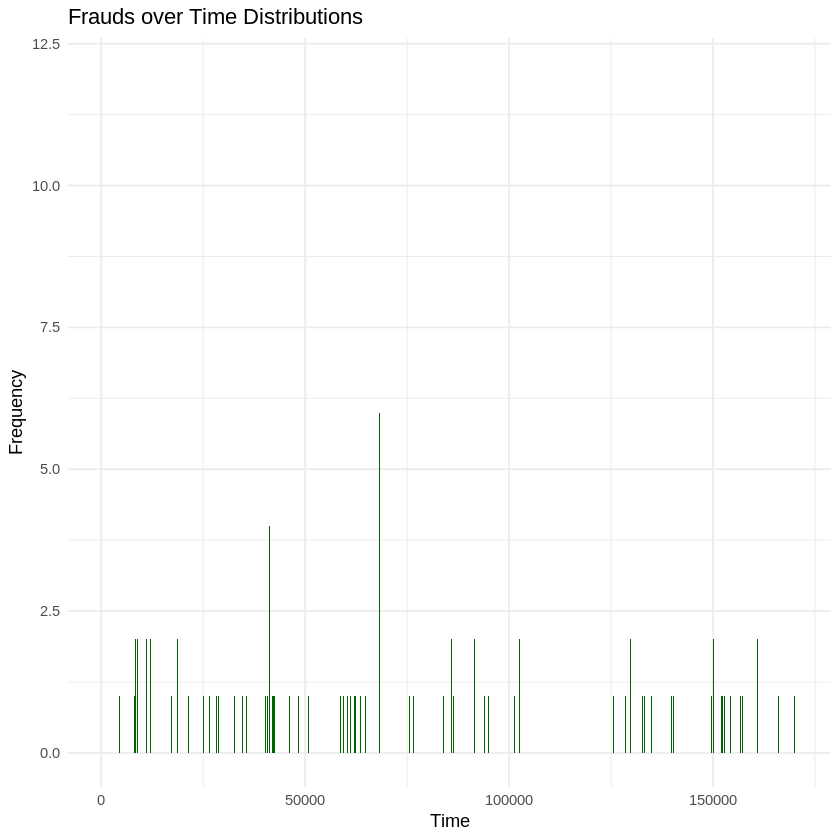

In [ ]:

# Frauds over Time

creditcard[creditcard$Class == 1,] %>%
  ggplot(aes(Time)) +
  theme_minimal()  +
  geom_histogram(binwidth = 40, fill="darkgreen") +
  labs(title = "Frauds over Time Distributions",
       x = "Time",
       y = "Frequency")

top_fraud_times <- creditcard[creditcard$Class == 1,] %>%
  group_by(Time) %>%
  summarise(count = n()) %>%
  arrange(desc(count)) %>%
  head(n=10)

print(top_fraud_times)

In [ ]:

# Get lower triangle of the correlation matrix

get_lower_tri<-function(cormat){
  cormat[upper.tri(cormat)] <- NA
  return(cormat)
}

In [ ]:
# Get upper triangle of the correlation matrix

get_upper_tri <- function(cormat){
  cormat[lower.tri(cormat)]<- NA
  return(cormat)
}

In [ ]:

reorder_cormat <- function(cormat){
  # Use correlation between variables as distance
  dd <- as.dist((1-cormat)/2)
  hc <- hclust(dd)
  cormat <-cormat[hc$order, hc$order]
}

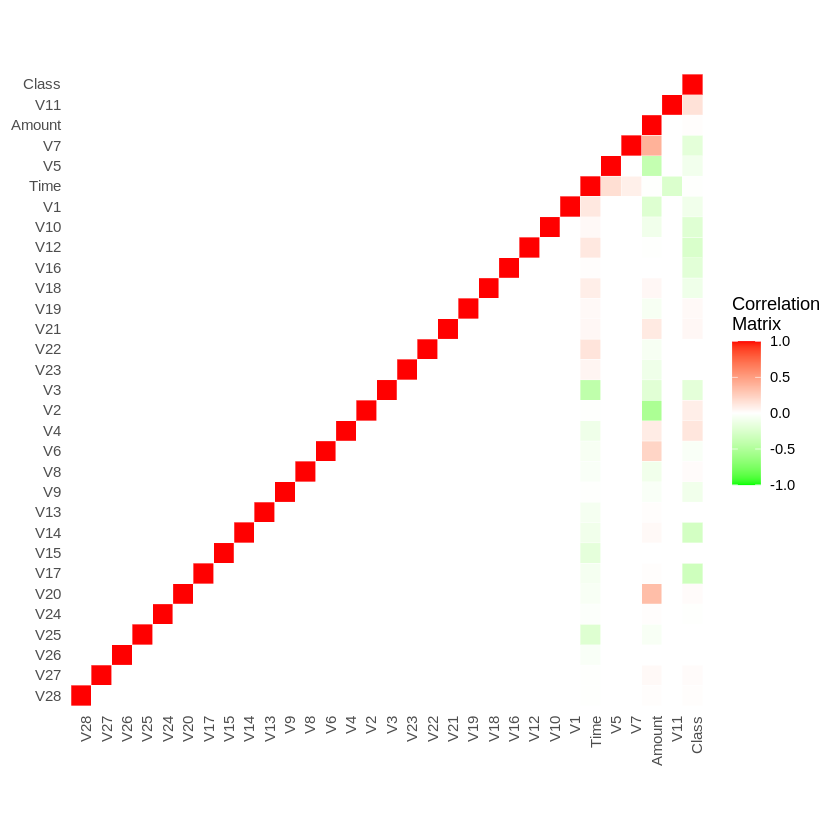

In [ ]:

corr_matrix <- round(cor(creditcard),2)
corr_matrix <- reorder_cormat(corr_matrix)

upper_tri <- get_upper_tri(corr_matrix)

melted_corr_matrix <- melt(upper_tri, na.rm = TRUE)


ggplot(melted_corr_matrix, aes(Var2, Var1, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "green", high = "red", mid = "white",
                       midpoint = 0, limit = c(-1,1), space = "Lab",
                       name="Correlation\nMatrix") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, vjust = 1,
                                   size = 9, hjust = 1), axis.text.y = element_text(size = 9), axis.title.x = element_blank(),
        axis.title.y = element_blank(),
        panel.grid.major = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
        axis.ticks = element_blank()) +
  coord_fixed()

In [ ]:

# Set seed for reproducibility

set.seed(1234)

In [ ]:

# Remove the "Time" column from the dataset

creditcard$Class <- as.factor(creditcard$Class)
creditcard <- creditcard %>% select(-Time)

In [ ]:

# Split the dataset into train, test dataset and cv

train_index <- createDataPartition(
  y = creditcard$Class,
  p = .6,
  list = F
)

train <- creditcard[train_index,]

test_cv <- creditcard[-train_index,]

test_index <- createDataPartition(
  y = test_cv$Class,
  p = .5,
  list = F)

test <- test_cv[test_index,]
cv <- test_cv[-test_index,]

rm(train_index, test_index, test_cv)

In [ ]:

# Create a baseline model that predict always "legal"
# (aka "0") transactions and compute all metrics

# Clone the creditcard dataframe

baseline_model <- data.frame(creditcard)

# Set Class al to Legal (0)

baseline_model$Class = factor(0, c(0,1))

In [ ]:

# Make predictions

pred <- prediction(
  as.numeric(as.character(baseline_model$Class)), as.numeric(as.character(creditcard$Class))
)

In [ ]:

# Compute the AUC and AUCPR

auc_val_baseline <- performance(pred, "auc")
auc_plot_baseline <- performance(pred, 'sens', 'spec')
aucpr_plot_baseline <- performance(pred, "prec", "rec")

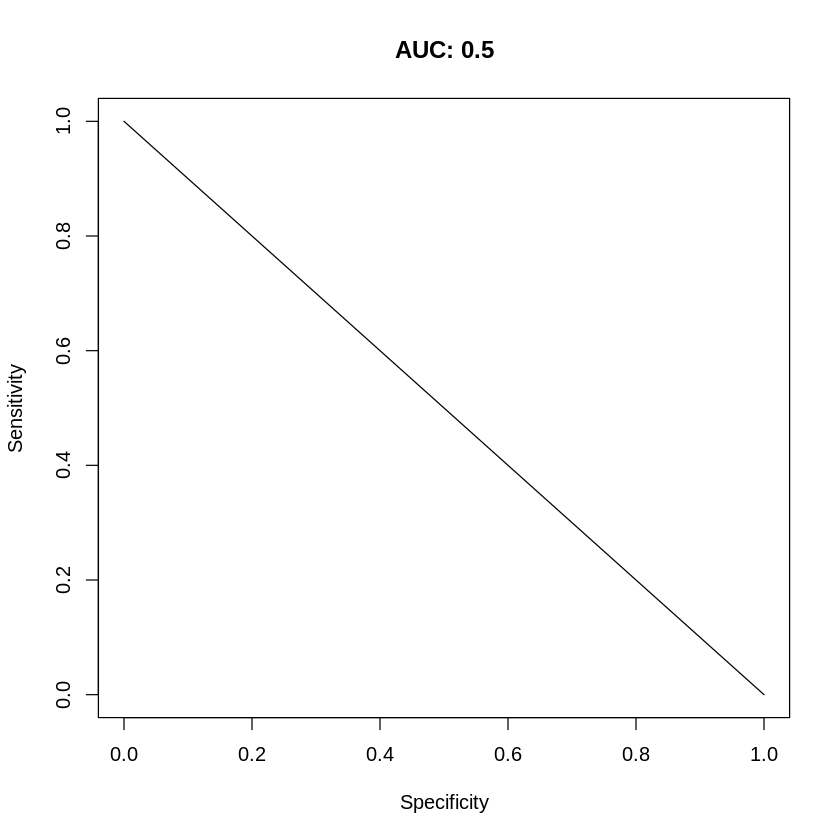

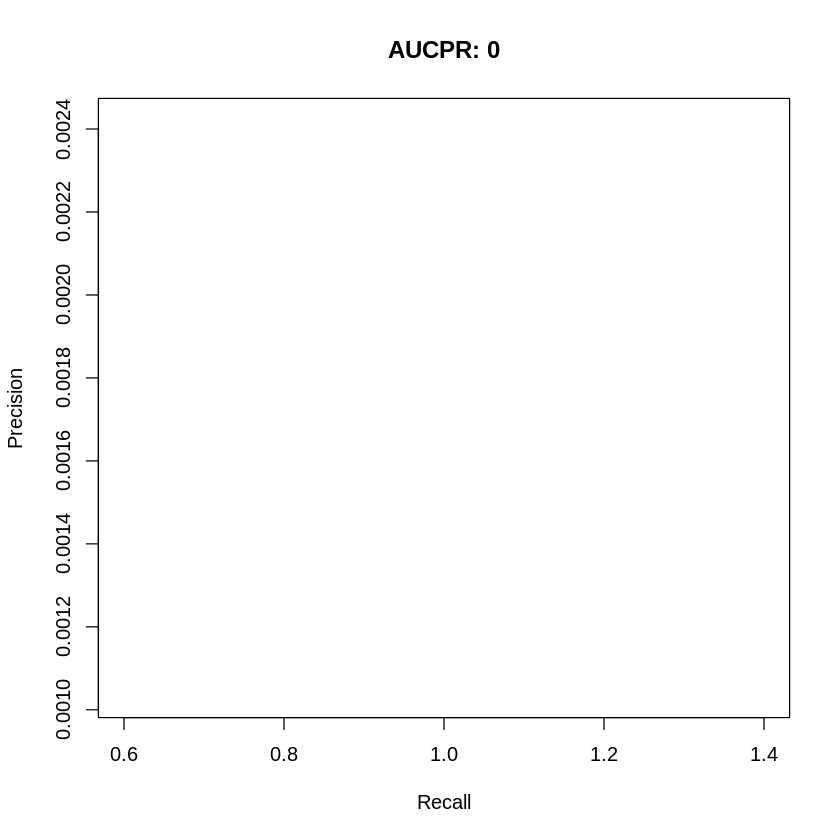

In [ ]:

# Make the relative plot

plot(auc_plot_baseline,
     main=paste("AUC:",
                auc_val_baseline@y.values[[1]])
)

plot(aucpr_plot_baseline, main="AUCPR: 0")

In [ ]:

# Create a dataframe 'results' that contains all metrics
# obtained by the trained models

results <- data.frame(
  Model = "Naive Baseline - Predict Always Legal",
  AUC = auc_val_baseline@y.values[[1]],
  AUCPR = 0
)

In [ ]:

# Show results on a table

print(results)

                                  Model AUC AUCPR
1 Naive Baseline - Predict Always Legal 0.5     0


In [ ]:
# Create a Naive Bayes Model, it will improve a little bit the
# results in AUC and AUCPR

# Set seed 1234 for reproducibility

set.seed(1234)

# Build the model with Class as target and all other variables
# as predictors

naive_model <- naiveBayes(Class ~ ., data = train, laplace=1)

In [ ]:

# Predict

predictions <- predict(naive_model, newdata=test)

# Compute the AUC and AUCPR for the Naive Model

pred <- prediction(as.numeric(predictions) , test$Class)

auc_val_naive <- performance(pred, "auc")

auc_plot_naive <- performance(pred, 'sens', 'spec')
aucpr_plot_naive <- performance(pred, "prec", "rec")

aucpr_val_naive <- pr.curve(
  scores.class0 = predictions[test$Class == 1],
  scores.class1 = predictions[test$Class == 0],
  curve = T,
  dg.compute = T
)

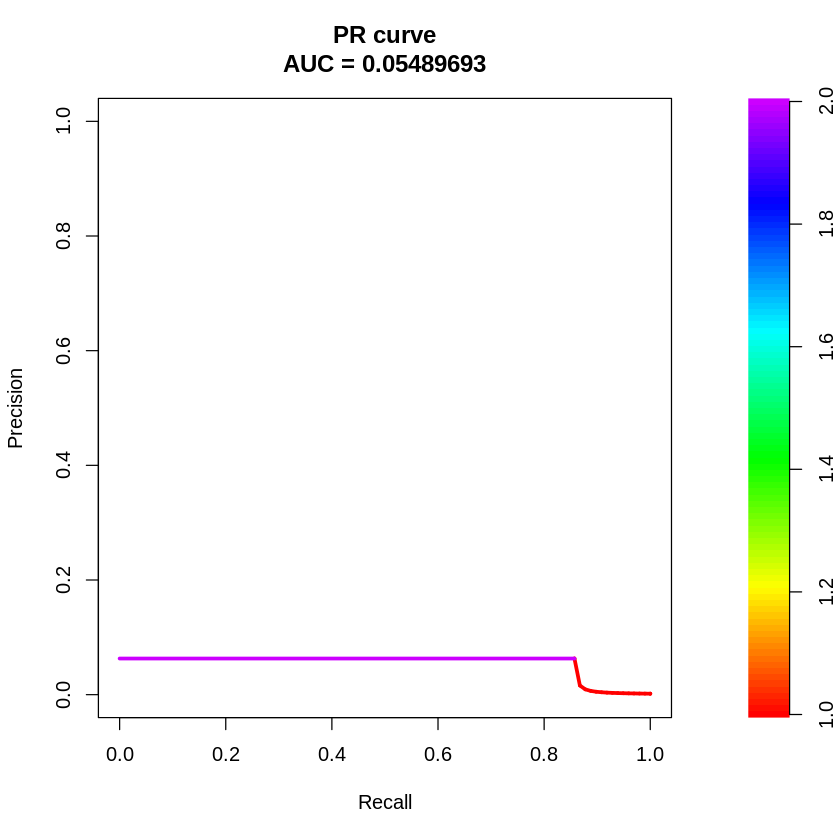

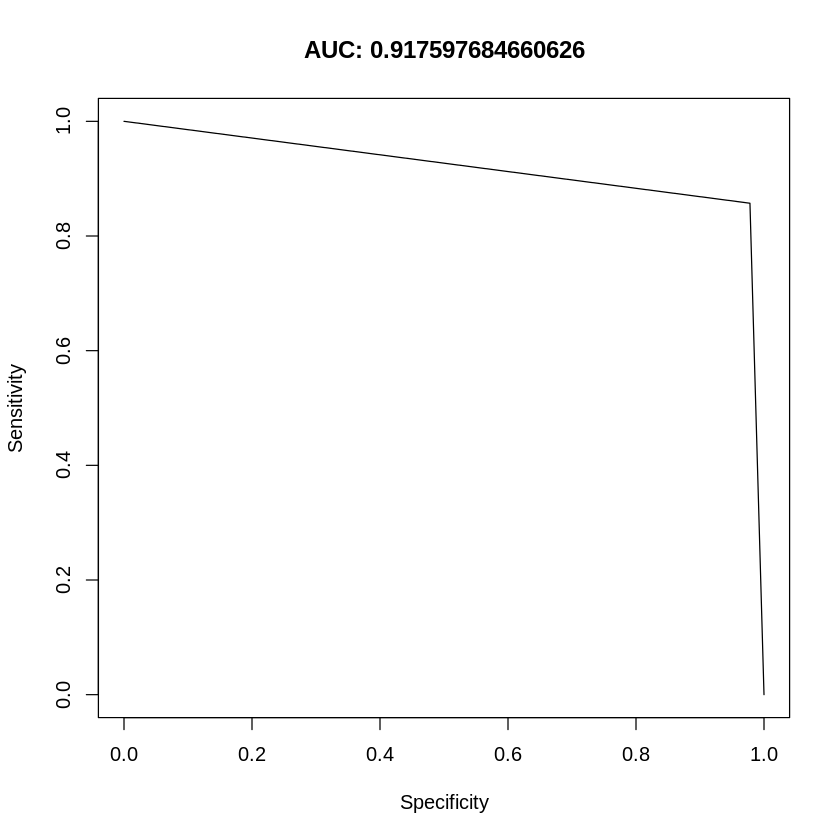

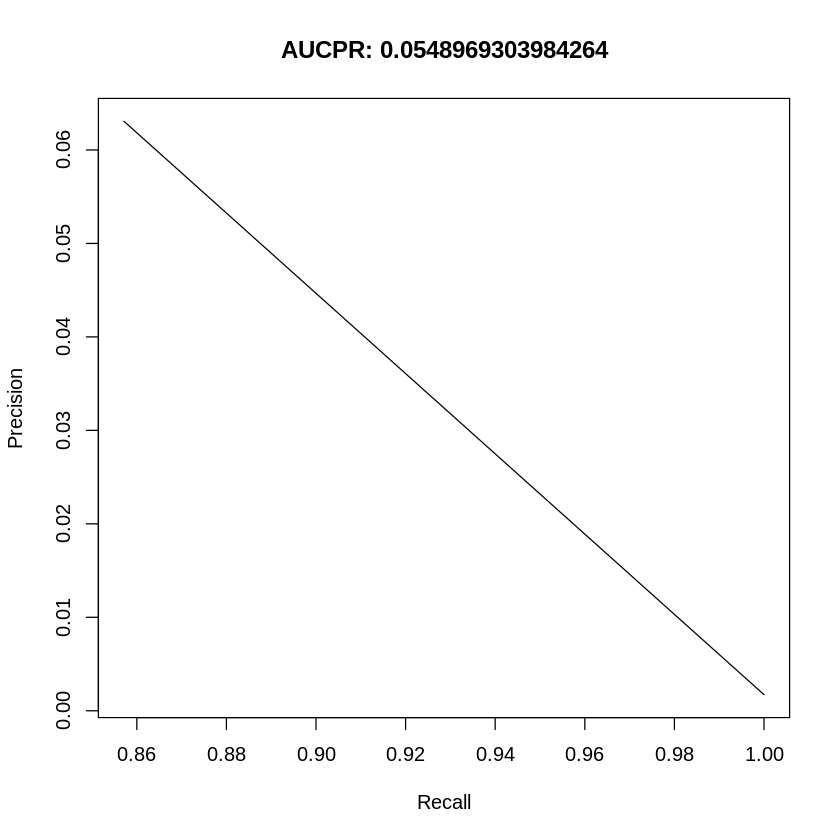

In [ ]:
# Make the relative plot

plot(aucpr_val_naive)
plot(auc_plot_naive, main=paste("AUC:", auc_val_naive@y.values[[1]]))
plot(aucpr_plot_naive, main=paste("AUCPR:", aucpr_val_naive$auc.integral))


In [ ]:

# Adding the respective metrics to the results dataset

results <- results %>% add_row(
  Model = "Naive Bayes",
  AUC = auc_val_naive@y.values[[1]],
  AUCPR = aucpr_val_naive$auc.integral
)

In [ ]:

# Show results on a table

print(results)

                                  Model       AUC      AUCPR
1 Naive Baseline - Predict Always Legal 0.5000000 0.00000000
2                           Naive Bayes 0.9175977 0.05489693


In [ ]:

# Set seed 1234 for reproducibility

set.seed(1234)

# Build a KNN Model with Class as Target and all other
# variables as predictors. k is set to 5

knn_model <- knn(train[,-30], test[,-30], train$Class, k=5, prob = TRUE)

# Compute the AUC and AUCPR for the KNN Model

pred <- prediction(
  as.numeric(as.character(knn_model)), as.numeric(as.character(test$Class))
)

auc_val_knn <- performance(pred, "auc")

auc_plot_knn <- performance(pred, 'sens', 'spec')
aucpr_plot_knn <- performance(pred, "prec", "rec")

aucpr_val_knn <- pr.curve(
  scores.class0 = knn_model[test$Class == 1],
  scores.class1 = knn_model[test$Class == 0],
  curve = T,
  dg.compute = T
)

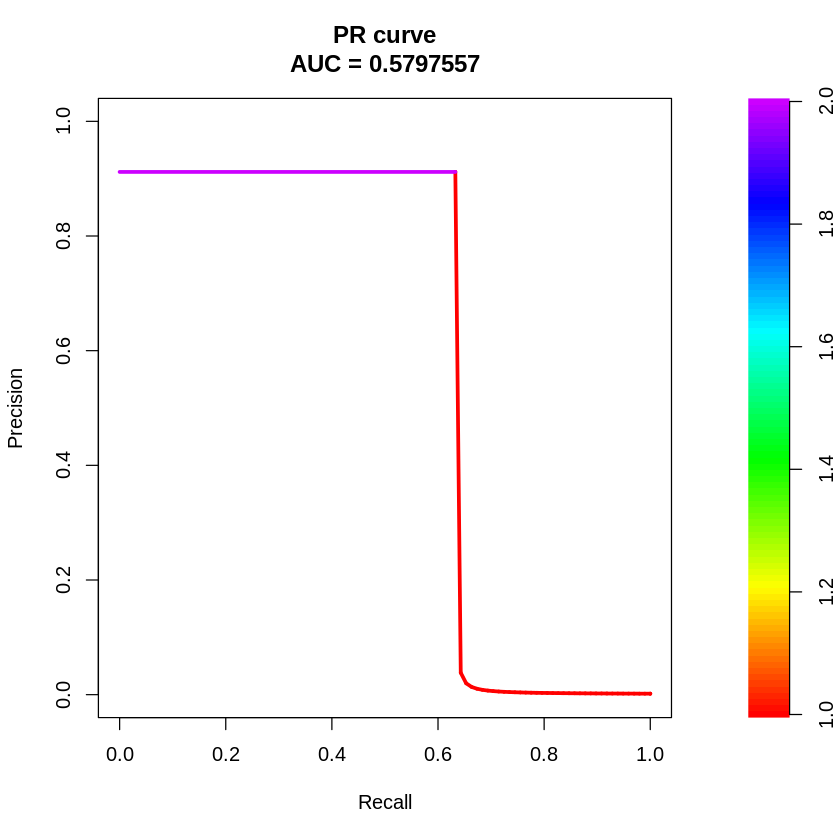

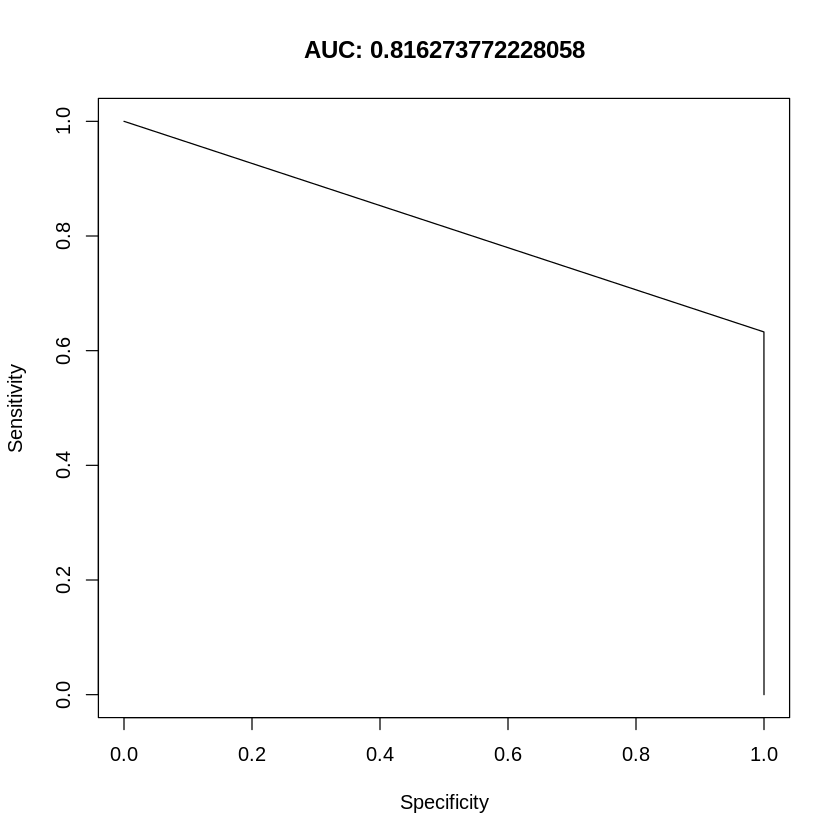

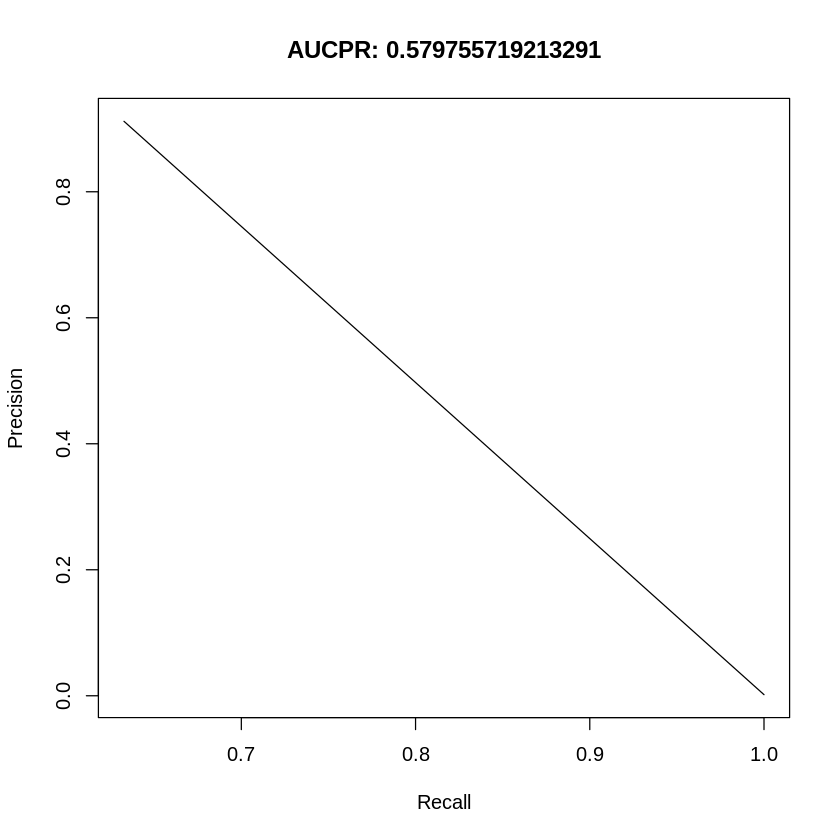

In [ ]:

# Make the relative plot

plot(aucpr_val_knn)
plot(auc_plot_knn, main=paste("AUC:", auc_val_knn@y.values[[1]]))
plot(aucpr_plot_knn, main=paste("AUCPR:", aucpr_val_knn$auc.integral))


In [ ]:
# Adding the respective metrics to the results dataset

results <- results %>% add_row(
  Model = "K-Nearest Neighbors k=5",
  AUC = auc_val_knn@y.values[[1]],
  AUCPR = aucpr_val_knn$auc.integral
)

In [ ]:

# Show results on a table

print(results)

                                  Model       AUC      AUCPR
1 Naive Baseline - Predict Always Legal 0.5000000 0.00000000
2                           Naive Bayes 0.9175977 0.05489693
3               K-Nearest Neighbors k=5 0.8162738 0.57975572


In [ ]:

# Set seed 1234 for reproducibility

set.seed(1234)

# Build a SVM Model with Class as Target and all other
# variables as predictors. The kernel is set to sigmoid

svm_model <- svm(Class ~ ., data = train, kernel='sigmoid')

# Make predictions based on this model

predictions <- predict(svm_model, newdata=test)

# Compute AUC and AUCPR

pred <- prediction(
  as.numeric(as.character(predictions)),                                 as.numeric(as.character(test$Class))
)

auc_val_svm <- performance(pred, "auc")

auc_plot_svm <- performance(pred, 'sens', 'spec')
aucpr_plot_svm <- performance(pred, "prec", "rec")

aucpr_val_svm <- pr.curve(
  scores.class0 = predictions[test$Class == 1],
  scores.class1 = predictions[test$Class == 0],
  curve = T,
  dg.compute = T
)


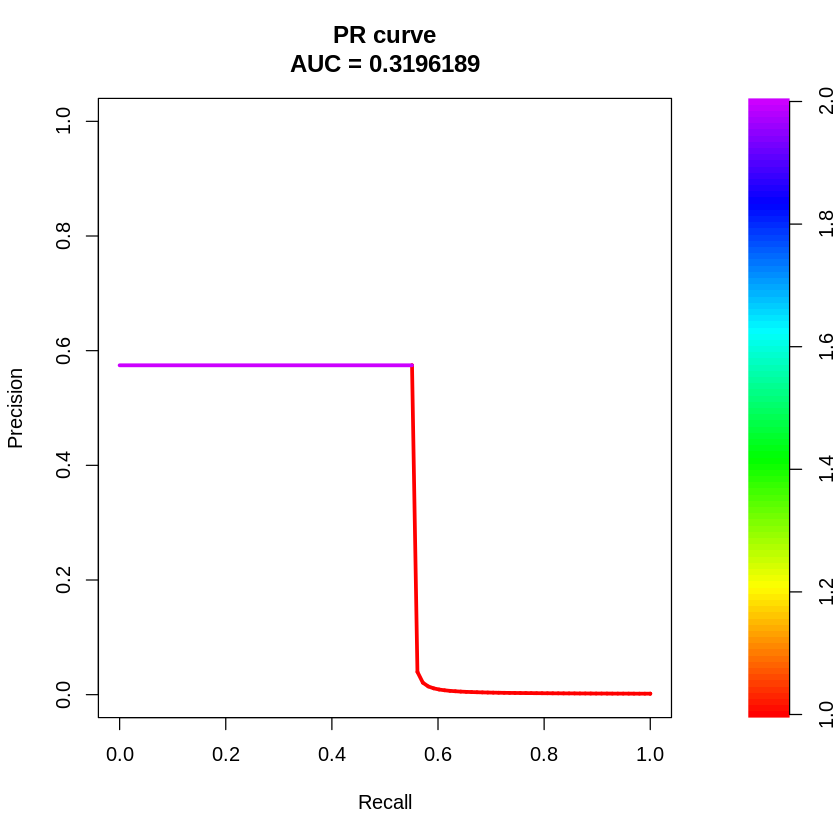

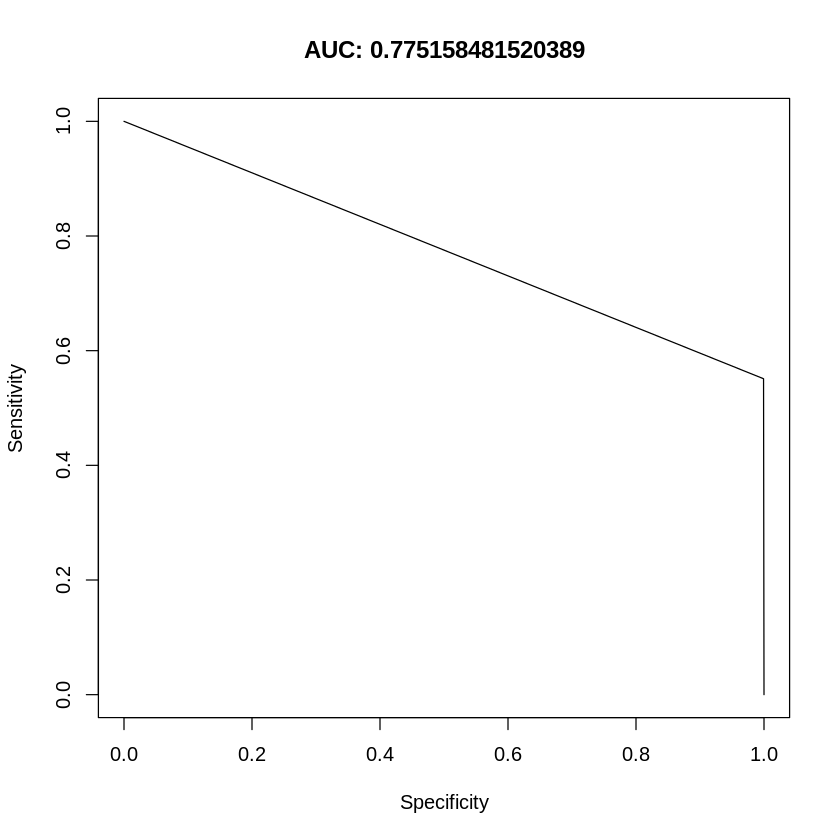

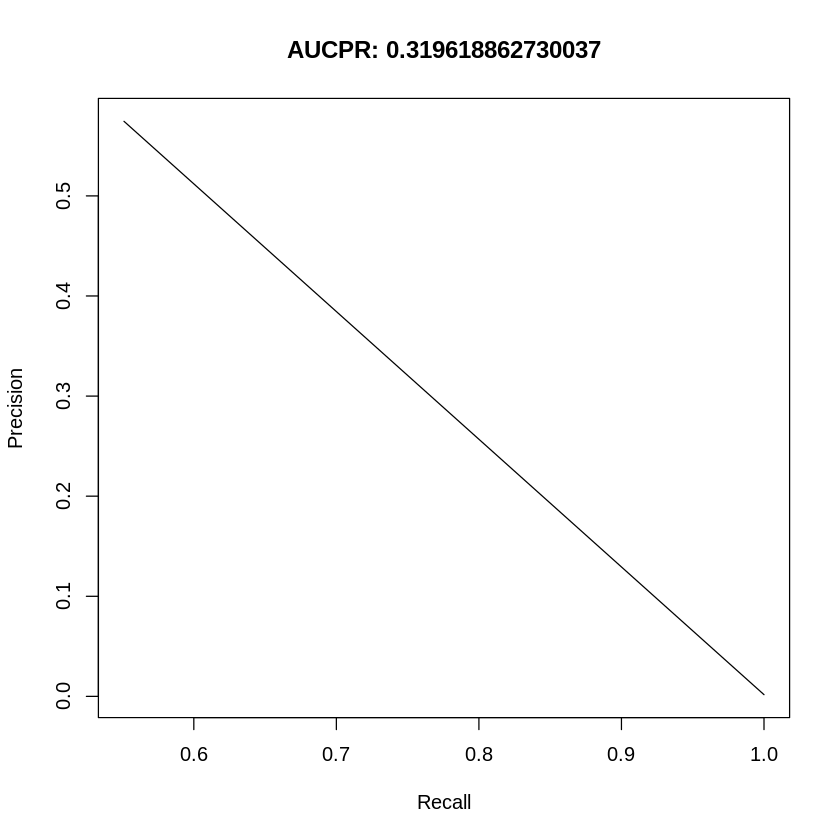

In [ ]:

# Make the relative plot

plot(aucpr_val_svm)
plot(auc_plot_svm, main=paste("AUC:", auc_val_svm@y.values[[1]]))
plot(aucpr_plot_svm, main=paste("AUCPR:", aucpr_val_svm$auc.integral))

In [ ]:
# Adding the respective metrics to the results dataset

results <- results %>% add_row(
  Model = "SVM - Support Vector Machine",
  AUC = auc_val_svm@y.values[[1]],
  AUCPR = aucpr_val_svm$auc.integral)

In [ ]:

# Show results on a table

print(results)

                                  Model       AUC      AUCPR
1 Naive Baseline - Predict Always Legal 0.5000000 0.00000000
2                           Naive Bayes 0.9175977 0.05489693
3               K-Nearest Neighbors k=5 0.8162738 0.57975572
4          SVM - Support Vector Machine 0.7751585 0.31961886


In [ ]:

# Set seed 1234 for reproducibility

set.seed(1234)

In [ ]:
# Build a Random Forest Model with Class as Target and all other
# variables as predictors. The number of trees is set to 500

rf_model <- randomForest(Class ~ ., data = train, ntree = 500)

# Get the feature importance

feature_imp_rf <- data.frame(importance(rf_model))

In [ ]:
# Make predictions based on this model

predictions <- predict(rf_model, newdata=test)

# Compute the AUC and AUPCR

pred <- prediction(
  as.numeric(as.character(predictions)), as.numeric(as.character(test$Class))
)

auc_val_rf <- performance(pred, "auc")

auc_plot_rf <- performance(pred, 'sens', 'spec')

aucpr_plot_rf <- performance(pred, "prec", "rec", curve = T,  dg.compute = T)

aucpr_val_rf <- pr.curve(scores.class0 = predictions[test$Class == 1], scores.class1 = predictions[test$Class == 0],curve = T,  dg.compute = T)


In [ ]:
# make the relative plot

plot(auc_plot_rf, main=paste("AUC:", auc_val_rf@y.values[[1]]))
plot(aucpr_plot_rf, main=paste("AUCPR:", aucpr_val_rf$auc.integral))
plot(aucpr_val_rf)

In [ ]:
# Adding the respective metrics to the results dataset

results <- results %>% add_row(
  Model = "Random Forest",
  AUC = auc_val_rf@y.values[[1]],
  AUCPR = aucpr_val_rf$auc.integral)

In [ ]:
# Show results on a table

print(results)


In [ ]:

# Show feature importance on a table

print(feature_imp_rf)

In [ ]:

# Set seet 1234 for reproducibility

set.seed(1234)

In [ ]:
# Prepare the training dataset

xgb_train <- xgb.DMatrix(
  as.matrix(train[, colnames(train) != "Class"]),
  label = as.numeric(as.character(train$Class))
)

# Prepare the test dataset

xgb_test <- xgb.DMatrix(
  as.matrix(test[, colnames(test) != "Class"]),
  label = as.numeric(as.character(test$Class))
)

# Prepare the cv dataset

xgb_cv <- xgb.DMatrix(
  as.matrix(cv[, colnames(cv) != "Class"]),
  label = as.numeric(as.character(cv$Class))
)

In [ ]:

# Prepare the parameters list.

xgb_params <- list(
  objective = "binary:logistic",
  eta = 0.1,
  max.depth = 3,
  nthread = 6,
  eval_metric = "aucpr"
)

In [ ]:

# Train the XGBoost Model

xgb_model <- xgb.train(
  data = xgb_train,
  params = xgb_params,
  watchlist = list(test = xgb_test, cv = xgb_cv),
  nrounds = 500,
  early_stopping_rounds = 40,
  print_every_n = 20
)

[1]	test-aucpr:0.658215	cv-aucpr:0.651097 
Multiple eval metrics are present. Will use cv_aucpr for early stopping.
Will train until cv_aucpr hasn't improved in 40 rounds.

[21]	test-aucpr:0.840461	cv-aucpr:0.838686 
[41]	test-aucpr:0.848370	cv-aucpr:0.857040 
[61]	test-aucpr:0.851833	cv-aucpr:0.865810 
[81]	test-aucpr:0.854736	cv-aucpr:0.872469 
[101]	test-aucpr:0.857385	cv-aucpr:0.877270 
[121]	test-aucpr:0.859244	cv-aucpr:0.879942 
[141]	test-aucpr:0.860808	cv-aucpr:0.882720 
[161]	test-aucpr:0.862110	cv-aucpr:0.884535 
[181]	test-aucpr:0.861194	cv-aucpr:0.886863 
[201]	test-aucpr:0.862116	cv-aucpr:0.886406 
[221]	test-aucpr:0.861835	cv-aucpr:0.886101 
Stopping. Best iteration:
[190]	test-aucpr:0.861816	cv-aucpr:0.887686



In [ ]:

# Get feature importance

feature_imp_xgb <- xgb.importance(colnames(train), model = xgb_model)

xgb.plot.importance(feature_imp_xgb, rel_to_first = TRUE, xlab = "Relative importance")

# Make predictions based on this model

predictions = predict(
  xgb_model,
  newdata = as.matrix(test[, colnames(test) != "Class"]),
  ntreelimit = xgb_model$bestInd
)

# Compute the AUC and AUPCR

pred <- prediction(
  as.numeric(as.character(predictions)),                                 as.numeric(as.character(test$Class))
)

auc_val_xgb <- performance(pred, "auc")

auc_plot_xgb <- performance(pred, 'sens', 'spec')
aucpr_plot_xgb <- performance(pred, "prec", "rec")

aucpr_val_xgb <- pr.curve(
  scores.class0 = predictions[test$Class == 1],
  scores.class1 = predictions[test$Class == 0],
  curve = T,
  dg.compute = T
)

ERROR: Error in xgb.importance(colnames(train), model = xgb_model): [21:01:02] src/c_api/c_api_utils.h:220: Check failed: custom_feature_names.size() == n_features (30 vs. 29) : Incorrect number of feature names.
Stack trace:
  [bt] (0) /usr/local/lib/R/site-library/xgboost/libs/xgboost.so(+0x6abfe) [0x7b8d4a709bfe]
  [bt] (1) /usr/local/lib/R/site-library/xgboost/libs/xgboost.so(+0x2c7889) [0x7b8d4a966889]
  [bt] (2) /usr/local/lib/R/site-library/xgboost/libs/xgboost.so(XGBoosterFeatureScore+0x436) [0x7b8d4a95e966]
  [bt] (3) /usr/local/lib/R/site-library/xgboost/libs/xgboost.so(XGBoosterFeatureScore_R+0x81) [0x7b8d4a704051]
  [bt] (4) /usr/lib/R/lib/libR.so(+0xfd2fa) [0x7b8d5d04d2fa]
  [bt] (5) /usr/lib/R/lib/libR.so(+0x1405cc) [0x7b8d5d0905cc]
  [bt] (6) /usr/lib/R/lib/libR.so(+0x1540ad) [0x7b8d5d0a40ad]
  [bt] (7) /usr/lib/R/lib/libR.so(Rf_eval+0x17b) [0x7b8d5d0a441b]
  [bt] (8) /usr/lib/R/lib/libR.so(+0x1565ef) [0x7b8d5d0a65ef]




In [ ]:
# Make the relative plot

plot(auc_plot_xgb, main=paste("AUC:", auc_val_xgb@y.values[[1]]))
plot(aucpr_plot_xgb, main=paste("AUCPR:", aucpr_val_xgb$auc.integral))
plot(aucpr_val_xgb)

# Adding the respective metrics to the results dataset

results <- results %>% add_row(
  Model = "XGBoost",
  AUC = auc_val_xgb@y.values[[1]],
  AUCPR = aucpr_val_xgb$auc.integral)

# Show results on a table

results %>%
  kable() %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed",           "responsive"),
                position = "center",
                font_size = 10,
                full_width = FALSE)

# Show feature importance on a table

feature_imp_xgb %>%
  kable() %>%
  kable_styling(bootstrap_options = c("striped", "hover", "condensed",           "responsive"),
                position = "center",
                font_size = 10,
                full_width = FALSE)

# Set seet 1234 for reproducibility

set.seed(1234)

In [ ]:
# Prepare the training dataset

lgb_train <- lgb.Dataset(
  as.matrix(train[, colnames(train) != "Class"]),
  label = as.numeric(as.character(train$Class))
)

# Prepare the test dataset

lgb_test <- lgb.Dataset(
  as.matrix(test[, colnames(test) != "Class"]),
  label = as.numeric(as.character(test$Class))
)

In [ ]:

# Prepare the cvtaset

lgb_cv <- lgb.Dataset(
  as.matrix(cv[, colnames(cv) != "Class"]),
  label = as.numeric(as.character(cv$Class))
)

# Prepare the parameters list

lgb_params = list(
  objective = "binary",
  metric = "binary_error"
)